# 1、商业上真正在用的，都是Domain Specific
# 2、AI已经解决了很多重复大量的劳动
# 3、一个真正的AI程序
a、结合了很多方法，有一些简单，有一些复杂
b、简单的方法主导+部分复杂的方法
# 罗姆剃刀原理

In [1]:
import random
print(random.choice("tommorrow".split("m")))   #random.choice()从序列中随机选取一个
import sys   
sys.setrecursionlimit(100000)

to


In [2]:
hello_to_someone = '''
say_hello = names hello tail
names = name names | name
name = Jhon | Mike | 老梁
hello = 你好 | 您来了 | 快请进
tail = 呀 | ！
'''
simple_grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小的
"""

In [3]:
def name():
    return random.choice("Jhon | Mile | 老梁".split("|"))
def hello():
    return random.choice("你好 | 您来了 | 快请进".split("|"))
def say_hello():
    return name() + hello()

In [4]:
say_hello()

' 老梁 您来了 '

In [5]:
rules = dict()  # key is @statement, value is @expression

In [6]:
def get_generation_by_gram(grammar_rules:str,target,stmt_split= "=",or_split = "|"):
    rules = dict() 
    for line in grammar_rules.split("\n"):
        if not line:continue
        #skip the empty line
        stmt , expr = line.split(stmt_split)
        rules[stmt.strip()] = expr.split(or_split)
    generated =  generate(rules,target=target)
    return generated


In [7]:
# rules["name"].remove("老刘")

In [8]:
def generate(grammar_rule,target):
    if target in grammar_rule:
        candidates = grammar_rule[target]
        candidate = random.choice(candidates)
        return "".join(generate(grammar_rule,target=c.strip()) for c in candidate.split())
    else:
        return target

In [9]:
# a1 = [1,3]
# a1.append("a")   #append方法会修改原来的列表，但是无返回值
# print(a1)
# a = " fsa fasd afas"
# "-".join(a)
# dict1 = {1:"341",2:"23213"}
# # print(dict1.keys())
# for i in dict1:     #遍历字典中的key
#     print(i)

# def faf():
#     return 1
# print(faf)
# a = "  fa a a"
# b = a.split() #默认分隔符是空字符串
# b

In [10]:
# generate(rules,target = "say_hello")
get_generation_by_gram(hello_to_someone,"say_hello")

'Jhon你好！'

In [11]:
get_generation_by_gram(simple_grammar,target = "sentence" ,stmt_split= "=>" )

'一个蓝色的小猫看着一个小的好看的蓝色的女人'

# data driven
1990s,机器学习的第一篇真正应用的论文，就是data driven
  期望我们的程序，根据我们输入的数据，自动进行处理，而不是数据一变，我们的程序随之变化。
智能客服机器人
微软小冰
建行的机器人，中行的机器人
文本的分析匹配
## 只要你发现有大量的if-else

In [12]:
simpel_program = '''
if_stmt => if ( cond ) { stmt }
cond => var op var
op => > | =< | < | = | >= | ==
stmt => assign | if_stmt
assign => var = var
var => char var | char
char => a | b | c | d | e
'''

In [13]:
for i in range(20):
    print(get_generation_by_gram(simpel_program,target = "if_stmt",stmt_split= "=>"))

if(a=<e){b=bddad}
if(c>b){c=ddaddae}
if(d=daeab){b=ebe}
if(c==c){a=ec}
if(d=<b){b=a}
if(e>c){c=ad}
if(cdbbce==c){if(aa<ee){if(e==ce){a=e}}}
if(a>=b){cdb=e}
if(ee<abbad){ebe=d}
if(dc>=b){if(d==e){c=edbdea}}
if(ebccc>ddd){b=abe}
if(ccaa==ba){cee=d}
if(dd==eeecbdda){if(ebbee>e){if(ce=ab){if(e==e){cb=d}}}}
if(e<bbdb){a=ebaae}
if(ed>=ee){b=e}
if(d=<eb){if(ae<b){if(a=a){if(a==cccbdce){if(cc>=c){if(caa<e){e=dec}}}}}}
if(a>=c){bc=bcb}
if(a==e){if(e=<b){b=dccba}}
if(edc<d){ce=ea}
if(e>a){if(bca<b){ecca=ded}}


# language model
Input = Sentence(w1...wn)
Output = Probability(0-1)
# 2-Gram


In [5]:
corpus = '/Users/Administrator/NLP_learning/article_9k.txt'

In [6]:
FILE = open(corpus).read()

In [16]:
# random.sample()可以从指定的序列中，随机的截取指定长度的片断，不作原地修改。
def generate_by_pro(FILE,LEN=20):
    return "".join(random.sample(FILE,LEN))
generate_by_pro(FILE)

'可等的联市2色83者投io来续徒法i责放'

In [17]:
# pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [3]:
import jieba

In [7]:
sub_file = FILE[:100000]
sub_file

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息\n骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台\n此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可能与刘作虎所说一加手机5要做市面最轻薄大屏旗舰的设定有关按照目前掌握的资料一加手机5拥有55寸1080P三星AMOLED显示屏6G8GBRAM64GB128GBROM双1600万摄像头备货量惊喜根据京东泄露的信息一加5起售价是xx99元应该是在279928992999中的某个\n这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车新华社记者张立云摄\n原标题44岁女子跑深圳约会网友被拒暴雨中裸身奔走深圳交警微博称昨日清晨交警发现有一女子赤裸上身行走在南坪快速上期间还起了轻生年头一辅警发现后赶紧为其披上黄衣并一路劝说她那么事发时到底都发生了些什么呢南都记者带您一起还原现场南都记者在龙岗大队坂田中队见到了辅警刘青发现女生的辅警一位外表高大帅气说话略带些腼腆的90后青年刘青介绍6月16日早上7时36分他正在环城南路附近值勤接到中队关于一位女子裸身进入机动车可能有危险的警情随后骑着小铁骑开始沿路寻找大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子女子身上一丝不挂地逆车流而行时走时停时坐时躺险象环生刘青停好小铁骑和另外一名巡防员追了上去发现女子的情绪很低落话不多刘青尝试和女子交流劝说女子离开可女

In [8]:
def cut(string):
    return list(jieba.cut(string))

In [9]:
TOKENS = cut(sub_file)
TOKENS

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 2.161 seconds.
Prefix dict has been built succesfully.


['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息',
 '\n',
 '骁龙',
 '835',
 '作为',
 '唯一',
 '通过',
 'Windows10',
 '桌面',
 '平台',
 '认证',
 '的',
 'ARM',
 '处理器',
 '高通',
 '强调',
 '不会',
 '因为',
 '只',
 '考虑',
 '性能',
 '而',
 '去',
 '屏蔽掉',
 '小',
 '核心',
 '相反',
 '他们',
 '正',
 '联手',
 '微软',
 '找到',
 '一种',
 '适合',
 '桌面',
 '平台',
 '的',
 '兼顾',
 '性能',
 '和',
 '功耗',
 '的',
 '完美',
 '方案',
 '报道',
 '称',
 '微软',
 '已经',
 '拿到',
 '了',
 '一些',
 '新',
 '的',
 '源码',
 '以便',
 'Windows10',
 '更好',
 '地',
 '理解',
 'biglittle',
 '架构',
 '资料',
 '显示',
 '骁龙',
 '835',
 '作为',
 '一

In [22]:
from collections import Counter
%matplotlib inline

In [23]:
words_count = Counter(TOKENS)
words_with_fre = [f for w,f in words_count.most_common()]  
# Counter(x).most_common(3)出现次数最多的前n个元素及其次数

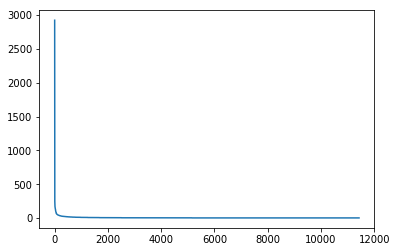

In [24]:
import matplotlib.pyplot as plt
plt.plot(words_with_fre)

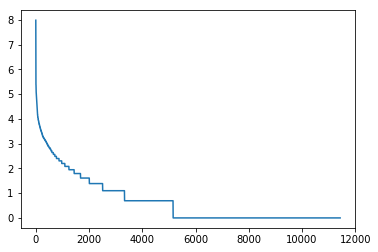

In [25]:
import numpy as np
plt.plot(np.log(words_with_fre))

H:\soft\anconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


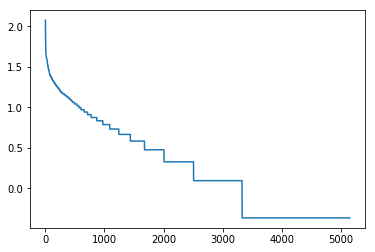

In [29]:
plt.plot(np.log(np.log(words_with_fre)))

在大量的文本中，出现次数第二多的单词，它出现 
的概率是，出现频率最高单词的1/2，
出现频率第三高的单词，频率是最高单词的1/3，   1000=>1/1000

In [31]:
def prob1_word(word):
    return words_count[word]/len(TOKENS)

In [45]:
# prob1_word("")

0.0

In [27]:
_two_grams_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [50]:
_two_grams_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

$$Pr(sentence) = Pr(w_1\cdot w_2\cdots w_n) = \prod \frac{count(w_i,w_{i+1})}{count(wi)}$$

In [91]:
words_count_2 = Counter(_two_grams_words)
words_count_2.most_common(10)

[('6月', 117),
 ('跨境融资', 49),
 ('也是', 35),
 ('的是', 33),
 ('这样的', 31),
 ('商业养老保险', 31),
 ('2017年', 30),
 ('月23', 27),
 ('都是', 27),
 ('声明本文', 27)]

In [52]:
# words_count.items()

In [62]:
#第一种方法
def prob2(word1,word2):
    if word1+word2 in words_count_2:return words_count_2[word1+word2]/words_count[word2]
    else:
        return 1/len(words_count_2)
prob2("我在","家")

2.4143509017600618e-05

In [70]:
# words_count.most_common()[-1][-1]

In [74]:
def get_grams_count(word,wc):
    if word in wc:return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [92]:
get_grams_count("6月",words_count_2)

117

In [149]:
def get_two_grams_prob(sentence):
    tokens = cut(sentence)
    probability = 1
    pro =1
    for i in range(len(tokens)-1):
        first_word = tokens[i]
        next_word = tokens[i+1]
        
        _two_grams = get_grams_count(first_word+next_word,words_count_2)
        _one_grams = get_grams_count(next_word,words_count)
        pro  = _two_grams / _one_grams
        probability *= pro
    return probability
        

In [150]:
get_two_grams_prob("此外自本周6月12日起除小米手机6等15款记性外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部经理")

5.439954169126118e-34

In [151]:
get_two_grams_prob("此外自本周6月12日起除小米手机6等15款机型外其余记性已版内测稳定版暂不受影响以确保工程师可以集中全部精力")

2.8200722412749808e-27

In [133]:
get_two_grams_prob("此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部经理")

8.610247181269576e-39

In [152]:
get_two_grams_prob("这个人来自清华大学")

9.523809523809524e-05

In [154]:
get_two_grams_prob("这个人来自情话大学")

3.401360544217687e-05

In [156]:
get_two_grams_prob("前天早上吃早饭的时候")

1.6044316089915724e-05

In [158]:
get_two_grams_prob("前天早上吃晚饭的时候") 

4.8132948269747175e-05

# 错误：more data,better result